Starting analysis...
Loading data for India...
Analyzing Gaza-Israel stance for India...


/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


Analysis completed for India
Loading data for Egypt...
Analyzing Gaza-Israel stance for Egypt...


/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


Analysis completed for Egypt
Loading data for Jordan...
Analyzing Gaza-Israel stance for Jordan...


/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


Analysis completed for Jordan


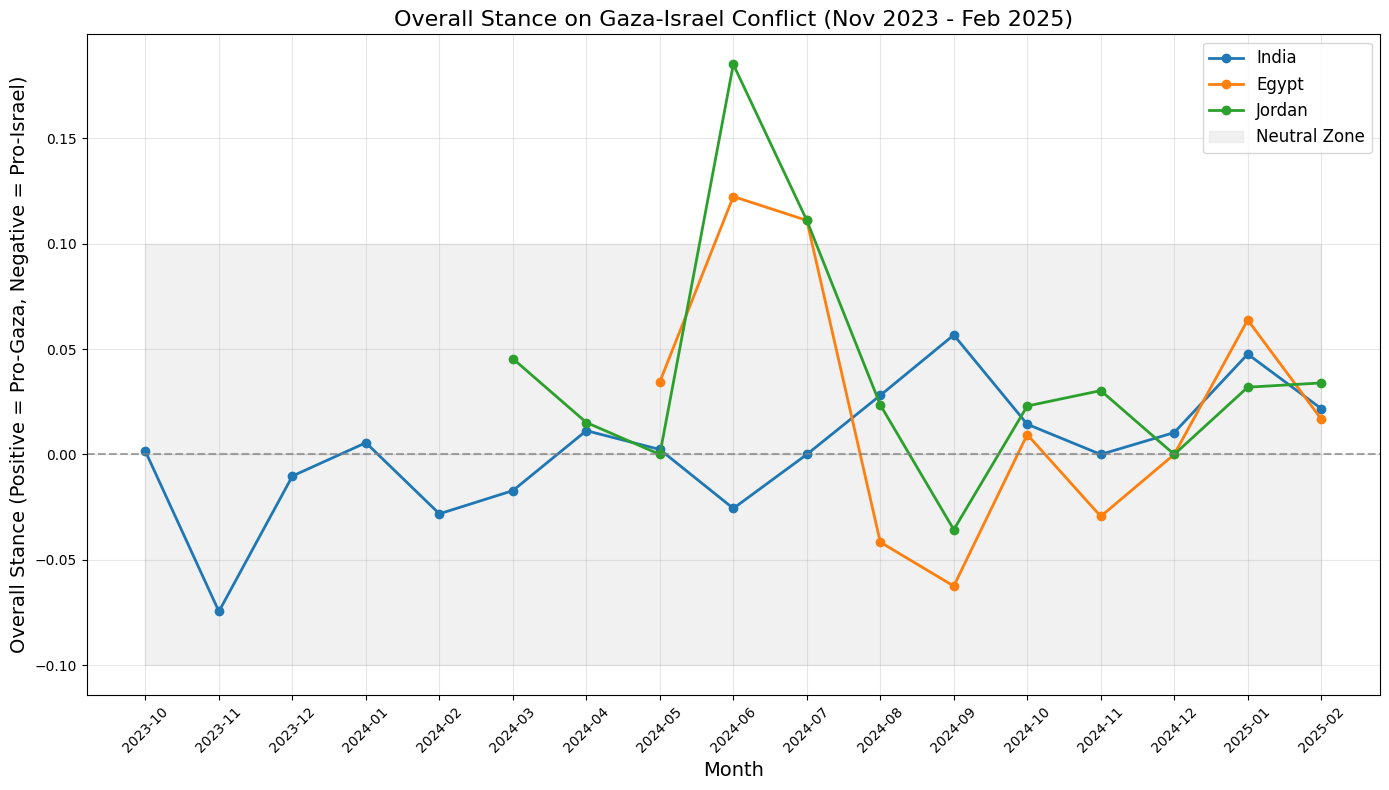

/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


<Figure size 1600x600 with 0 Axes>

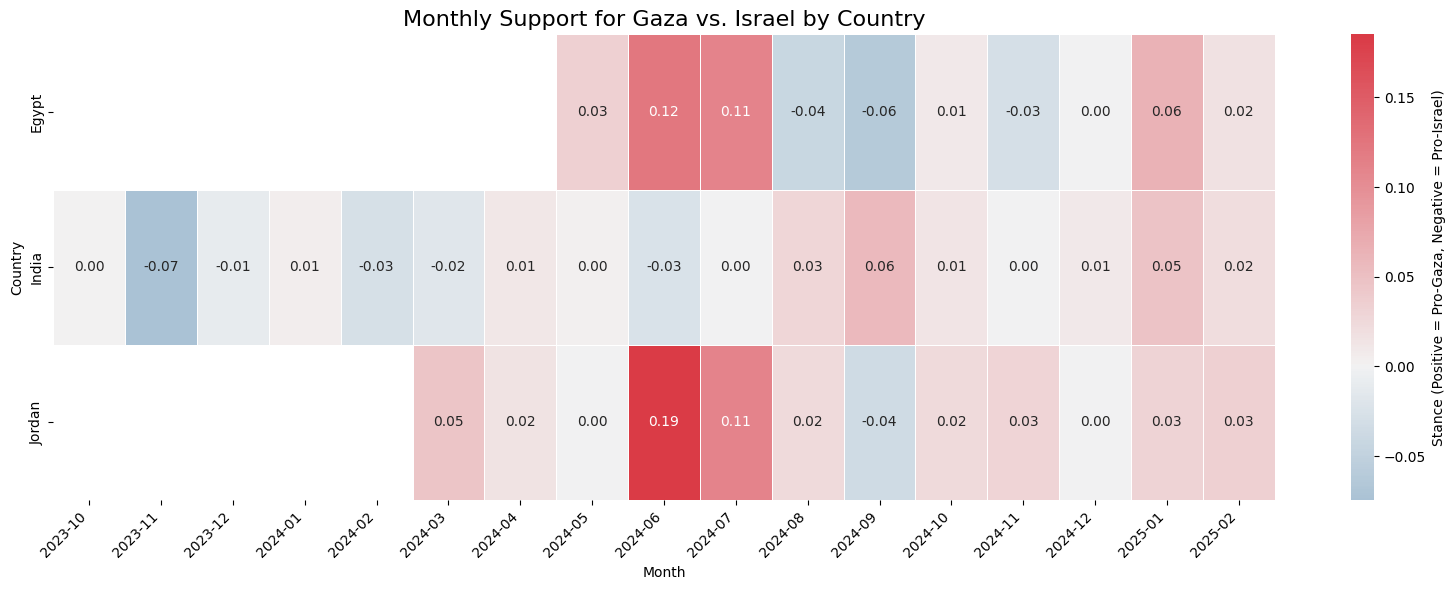

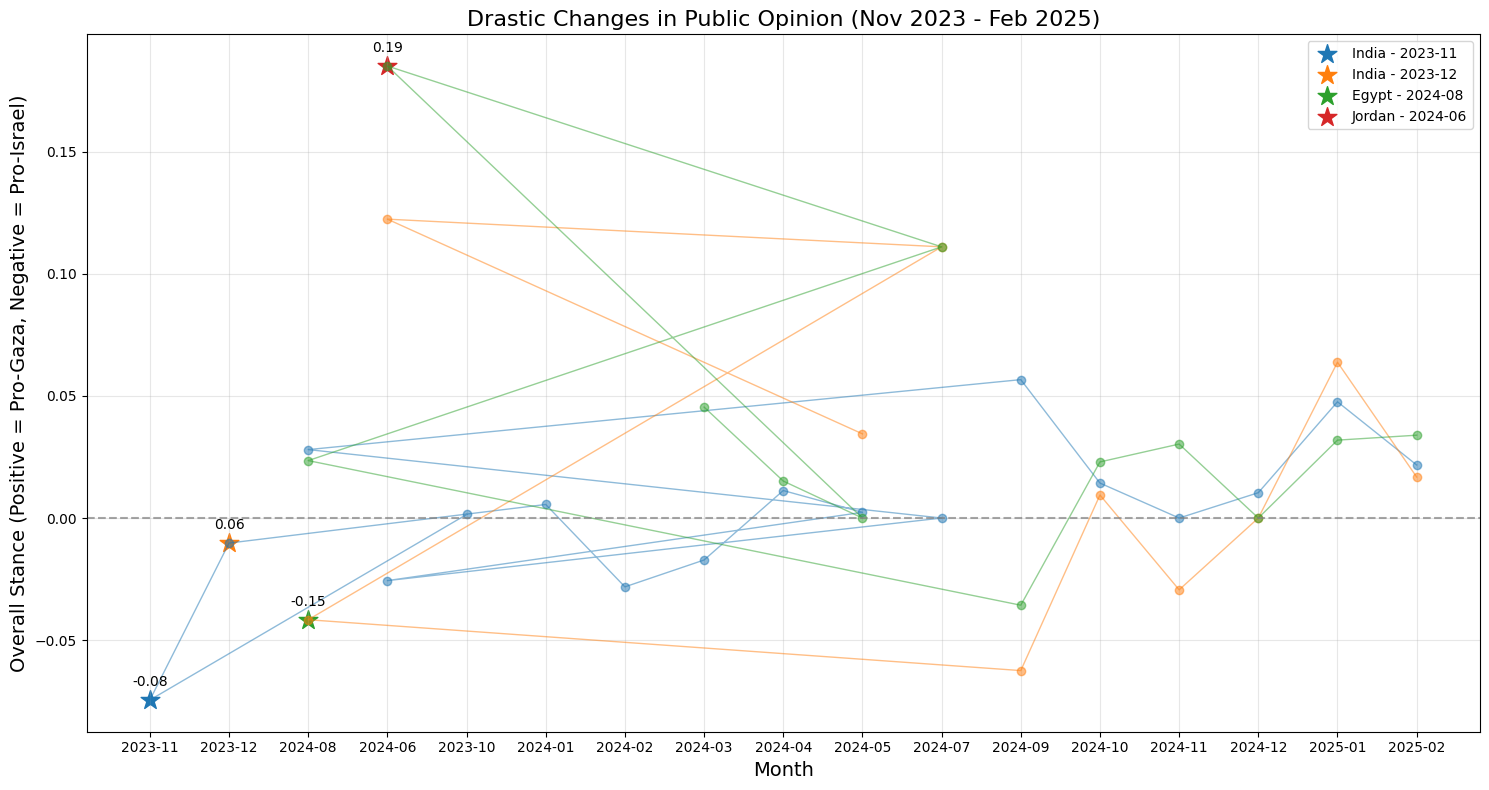


Summary of Findings:
  Country  Average Stance Predominant Support Most Pro-Gaza Month  \
0   India        0.002562       Neutral/Mixed             2024-09   
1   Egypt        0.022453       Neutral/Mixed             2024-06   
2  Jordan        0.038655       Neutral/Mixed             2024-06   

  Most Pro-Israel Month Months with Drastic Changes  
0               2023-11            2023-11, 2023-12  
1               2024-09                     2024-08  
2               2024-09                     2024-06  

Results saved to gaza_israel_opinion_analysis.xlsx
Visualizations saved as PNG files in the current directory


<ipython-input-6-d66516b4d693>:321: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Country'] = country
<ipython-input-6-d66516b4d693>:321: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Country'] = country
<ipython-input-6-d66516b4d693>:321: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

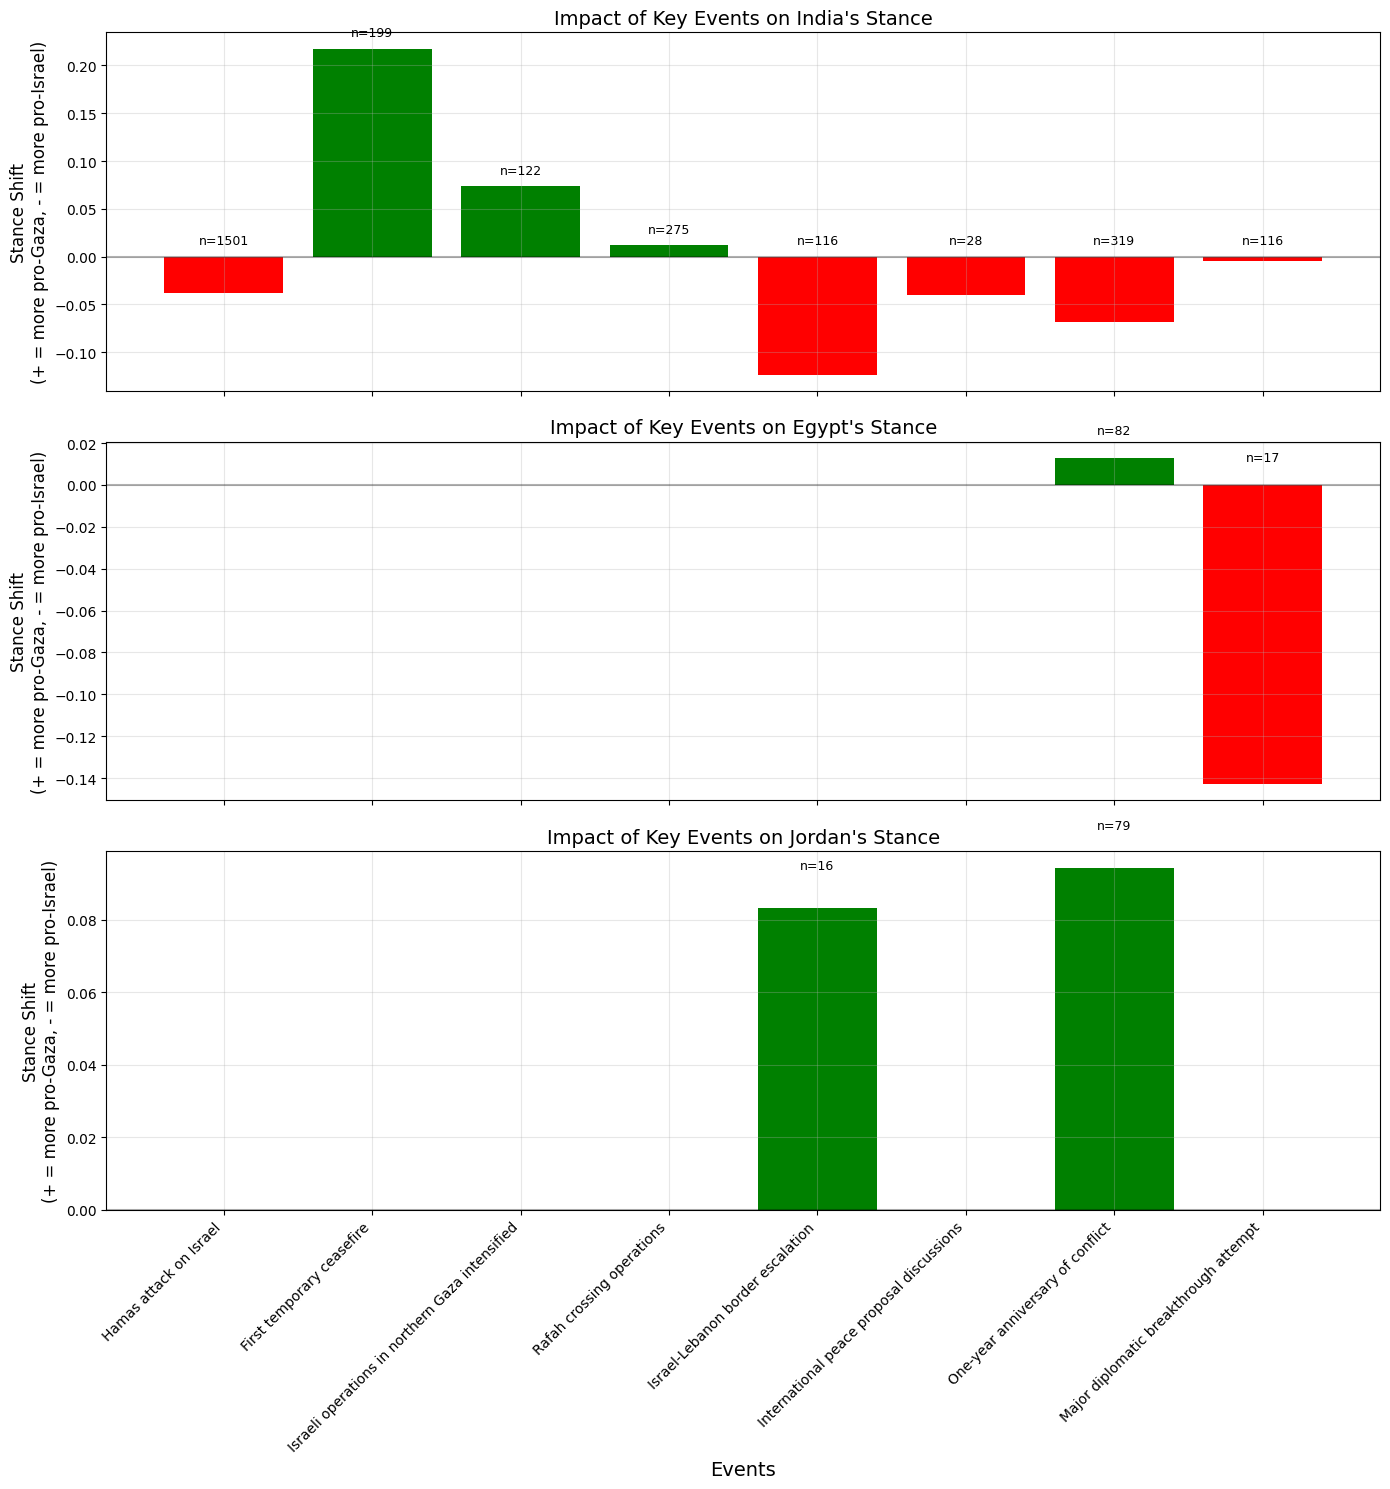

Event impact analysis completed and added to Excel.

=== FINAL CONCLUSIONS ===

India:
- Predominantly supports: Neutral/Mixed
- Average stance: 0.00 (Pro-Gaza)
- Most pro-Gaza month: 2024-09
- Most pro-Israel month: 2023-11
- Drastic opinion changes occurred in: 2023-11, 2023-12

Egypt:
- Predominantly supports: Neutral/Mixed
- Average stance: 0.02 (Pro-Gaza)
- Most pro-Gaza month: 2024-06
- Most pro-Israel month: 2024-09
- Drastic opinion changes occurred in: 2024-08

Jordan:
- Predominantly supports: Neutral/Mixed
- Average stance: 0.04 (Pro-Gaza)
- Most pro-Gaza month: 2024-06
- Most pro-Israel month: 2024-09
- Drastic opinion changes occurred in: 2024-06


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from collections import Counter
import numpy as np
from datetime import datetime

# File paths for each country
file_paths = {
    "India": "/kaggle/input/new007/India_data.xlsx",
    "Egypt": "/kaggle/input/new007/Egypt_data.xlsx",
    "Jordan": "/kaggle/input/new007/Jordan_data.xlsx"
}

# Initialize sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Define keywords associated with each side of the conflict
gaza_keywords = ['gaza', 'hamas', 'palestine', 'palestinian', 'palestinians', 'gazan']
israel_keywords = ['israel', 'israeli', 'israelis', 'idf', 'zionist', 'zionism']

# Words commonly used to express support or criticism
support_words = ['support', 'defend', 'stand with', 'solidarity', 'ally', 'friend', 'back', 'help']
criticism_words = ['condemn', 'criticize', 'against', 'oppose', 'denounce', 'attack', 'blame', 'genocide']

def analyze_gaza_israel_sentiment(file_path, country):
    print(f"Loading data for {country}...")
    # Load dataset
    df = pd.read_excel(file_path)
    
    # Convert date column to datetime
    df['Date'] = pd.to_datetime(df['Date'])
    
    # Create a combined text field
    df['comment'] = df['Title'].fillna('')
    if 'Text' in df.columns:
        df['comment'] = df.apply(
            lambda row: row['comment'] + ' ' + str(row['Text']) if pd.notna(row['Text']) else row['comment'], 
            axis=1
        )
    
    # Convert all text to lowercase for better matching
    df['comment_lower'] = df['comment'].str.lower()
    
    # Function to detect mentions and sentiment towards Gaza/Palestine and Israel
    def detect_stance(text):
        text = str(text).lower()
        
        # Check for mentions
        gaza_mentioned = any(keyword in text for keyword in gaza_keywords)
        israel_mentioned = any(keyword in text for keyword in israel_keywords)
        
        # Initialize sentiment scores
        gaza_sentiment = 0
        israel_sentiment = 0
        
        # If neither side is mentioned, return neutral values
        if not gaza_mentioned and not israel_mentioned:
            return {
                'gaza_mentioned': 0,
                'israel_mentioned': 0,
                'gaza_sentiment': 0,
                'israel_sentiment': 0,
                'gaza_support_score': 0,
                'israel_support_score': 0
            }
        
        # Calculate general sentiment
        sentiment = sia.polarity_scores(text)['compound']
        
        # Check for specific support/criticism patterns
        gaza_support_score = 0
        israel_support_score = 0
        
        # Check for support/criticism patterns for Gaza
        if gaza_mentioned:
            # Check for support of Gaza
            for word in support_words:
                pattern = f"({word})(\\s+)(gaza|palestine|palestinian)"
                if re.search(pattern, text, re.IGNORECASE):
                    gaza_support_score += 1
                    
            # Check for criticism of Gaza
            for word in criticism_words:
                pattern = f"({word})(\\s+)(gaza|hamas|palestine|palestinian)"
                if re.search(pattern, text, re.IGNORECASE):
                    gaza_support_score -= 1
            
            # Calculate overall Gaza sentiment
            gaza_sentiment = sentiment if gaza_support_score >= 0 else -sentiment
        
        # Check for support/criticism patterns for Israel
        if israel_mentioned:
            # Check for support of Israel
            for word in support_words:
                pattern = f"({word})(\\s+)(israel|israeli)"
                if re.search(pattern, text, re.IGNORECASE):
                    israel_support_score += 1
                    
            # Check for criticism of Israel
            for word in criticism_words:
                pattern = f"({word})(\\s+)(israel|israeli|zionist)"
                if re.search(pattern, text, re.IGNORECASE):
                    israel_support_score -= 1
            
            # Calculate overall Israel sentiment
            israel_sentiment = sentiment if israel_support_score >= 0 else -sentiment
        
        return {
            'gaza_mentioned': 1 if gaza_mentioned else 0,
            'israel_mentioned': 1 if israel_mentioned else 0,
            'gaza_sentiment': gaza_sentiment,
            'israel_sentiment': israel_sentiment,
            'gaza_support_score': gaza_support_score,
            'israel_support_score': israel_support_score
        }
    
    print(f"Analyzing Gaza-Israel stance for {country}...")
    # Apply stance detection to each comment
    stances = df['comment_lower'].apply(detect_stance)
    
    # Convert the list of dictionaries to DataFrame columns
    stance_df = pd.DataFrame(stances.tolist())
    df = pd.concat([df, stance_df], axis=1)
    
    # Create a combined support metric (positive = pro-Gaza, negative = pro-Israel)
    df['overall_stance'] = df['gaza_support_score'] - df['israel_support_score']
    
    # Aggregate by month
    df['year_month'] = df['Date'].dt.to_period('M')
    
    monthly_data = df.groupby('year_month').agg({
        'gaza_mentioned': 'sum',
        'israel_mentioned': 'sum',
        'gaza_sentiment': 'mean',
        'israel_sentiment': 'mean',
        'gaza_support_score': 'mean',
        'israel_support_score': 'mean',
        'overall_stance': 'mean'
    }).reset_index()
    
    # Convert Period to string for plotting
    monthly_data['month_str'] = monthly_data['year_month'].astype(str)
    
    # Calculate relative support (which side is more supported)
    monthly_data['relative_support'] = monthly_data.apply(
        lambda row: 'Pro-Gaza' if row['overall_stance'] > 0.1 
                  else 'Pro-Israel' if row['overall_stance'] < -0.1 
                  else 'Neutral', 
        axis=1
    )
    
    # Calculate support intensity
    monthly_data['support_intensity'] = monthly_data['overall_stance'].abs()
    
    # Identify drastic changes in sentiment
    monthly_data['stance_change'] = monthly_data['overall_stance'].diff()
    
    # Define a threshold for drastic changes (adjust as needed)
    drastic_threshold = monthly_data['stance_change'].std() * 1.5
    monthly_data['drastic_change'] = monthly_data['stance_change'].abs() > drastic_threshold
    
    return monthly_data, df

# Run analysis for each country
results = {}
raw_data = {}
print("Starting analysis...")

for country, path in file_paths.items():
    try:
        monthly_data, full_df = analyze_gaza_israel_sentiment(path, country)
        results[country] = monthly_data
        raw_data[country] = full_df
        print(f"Analysis completed for {country}")
    except Exception as e:
        print(f"Error analyzing {country} data: {str(e)}")

# Visualize stance over time for each country
plt.figure(figsize=(14, 8))
for country, df in results.items():
    plt.plot(df['month_str'], df['overall_stance'], marker='o', linewidth=2, label=country)

plt.axhline(y=0, color='gray', linestyle='--', alpha=0.7)
plt.fill_between(results['India']['month_str'], 0, 0.1, color='lightgray', alpha=0.3, label='Neutral Zone')
plt.fill_between(results['India']['month_str'], -0.1, 0, color='lightgray', alpha=0.3)

plt.xticks(rotation=45)
plt.title("Overall Stance on Gaza-Israel Conflict (Nov 2023 - Feb 2025)", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Overall Stance (Positive = Pro-Gaza, Negative = Pro-Israel)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig("overall_stance_comparison.png")
plt.show()

# Create a heatmap of support intensity
plt.figure(figsize=(16, 6))
support_data = []

for country, df in results.items():
    for _, row in df.iterrows():
        value = row['overall_stance']
        intensity = abs(value)
        direction = 'Pro-Gaza' if value > 0.1 else 'Pro-Israel' if value < -0.1 else 'Neutral'
        support_data.append({
            'Country': country,
            'Month': row['month_str'],
            'Stance': value,
            'Direction': direction,
            'Intensity': intensity
        })

support_df = pd.DataFrame(support_data)

# Pivot the data for the heatmap
heatmap_data = support_df.pivot(index='Country', columns='Month', values='Stance')

# Create a custom colormap (red for pro-Israel, blue for pro-Gaza)
cmap = sns.diverging_palette(240, 10, as_cmap=True)

# Plot the heatmap
plt.figure(figsize=(16, 6))
ax = sns.heatmap(heatmap_data, cmap=cmap, center=0, annot=True, fmt=".2f", linewidths=.5, 
            cbar_kws={'label': 'Stance (Positive = Pro-Gaza, Negative = Pro-Israel)'})
plt.title("Monthly Support for Gaza vs. Israel by Country", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("support_heatmap.png")
plt.show()

# Identify and visualize drastic changes
drastic_changes = {}
for country, df in results.items():
    changes = df[df['drastic_change'] == True]
    if not changes.empty:
        drastic_changes[country] = changes

# Create a chart showing drastic opinion changes
plt.figure(figsize=(15, 8))
for country, df in drastic_changes.items():
    for idx, row in df.iterrows():
        plt.scatter(row['month_str'], row['overall_stance'], s=200, marker='*', 
                   label=f"{country} - {row['month_str']}" if country not in plt.gca().get_legend_handles_labels()[1] else "")
        plt.annotate(f"{row['stance_change']:.2f}", 
                    (row['month_str'], row['overall_stance']),
                    textcoords="offset points", 
                    xytext=(0,10), 
                    ha='center')

# Add the background lines for context
for country, df in results.items():
    plt.plot(df['month_str'], df['overall_stance'], marker='o', alpha=0.5, linewidth=1)

plt.axhline(y=0, color='gray', linestyle='--', alpha=0.7)
plt.title("Drastic Changes in Public Opinion (Nov 2023 - Feb 2025)", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Overall Stance (Positive = Pro-Gaza, Negative = Pro-Israel)", fontsize=14)
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.savefig("drastic_opinion_changes.png")
plt.show()

# Create summary dataframe with findings
summary_data = []
for country, df in results.items():
    # Overall stance (average)
    avg_stance = df['overall_stance'].mean()
    
    # Predominant support
    if avg_stance > 0.1:
        predominant_support = "Gaza/Palestine"
    elif avg_stance < -0.1:
        predominant_support = "Israel"
    else:
        predominant_support = "Neutral/Mixed"
    
    # Most pro-Gaza month
    pro_gaza_idx = df['overall_stance'].idxmax()
    most_pro_gaza = df.loc[pro_gaza_idx, 'month_str']
    
    # Most pro-Israel month
    pro_israel_idx = df['overall_stance'].idxmin()
    most_pro_israel = df.loc[pro_israel_idx, 'month_str']
    
    # Months with drastic changes
    drastic_months = df.loc[df['drastic_change'] == True, 'month_str'].tolist()
    
    summary_data.append({
        'Country': country,
        'Average Stance': avg_stance,
        'Predominant Support': predominant_support,
        'Most Pro-Gaza Month': most_pro_gaza,
        'Most Pro-Israel Month': most_pro_israel,
        'Months with Drastic Changes': ', '.join(drastic_months) if drastic_months else 'None'
    })

summary_df = pd.DataFrame(summary_data)
print("\nSummary of Findings:")
print(summary_df)

# Save all results to Excel
output_file = "gaza_israel_opinion_analysis.xlsx"
with pd.ExcelWriter(output_file) as writer:
    summary_df.to_excel(writer, sheet_name="Summary", index=False)
    for country, df in results.items():
        df.to_excel(writer, sheet_name=f"{country} Monthly", index=False)
    
    # Also save support heatmap data
    heatmap_data.to_excel(writer, sheet_name="Support Heatmap")
    
    # Create a sheet for drastic changes
    drastic_df = pd.DataFrame()
    for country, df in drastic_changes.items():
        df['Country'] = country
        if drastic_df.empty:
            drastic_df = df
        else:
            drastic_df = pd.concat([drastic_df, df])
    
    if not drastic_df.empty:
        drastic_df.to_excel(writer, sheet_name="Drastic Changes", index=False)

print(f"\nResults saved to {output_file}")
print("Visualizations saved as PNG files in the current directory")

# Add deeper analysis of key events 
def analyze_key_events(raw_data):
    # Create a timeline of notable events in the Gaza-Israel conflict
    key_events = [
        {'date': '2023-10-07', 'event': 'Hamas attack on Israel'},
        {'date': '2023-11-24', 'event': 'First temporary ceasefire'},
        {'date': '2024-01-01', 'event': 'Israeli operations in northern Gaza intensified'},
        {'date': '2024-02-15', 'event': 'Rafah crossing operations'},
        {'date': '2024-05-10', 'event': 'Israel-Lebanon border escalation'},
        {'date': '2024-07-15', 'event': 'International peace proposal discussions'},
        {'date': '2024-10-02', 'event': 'One-year anniversary of conflict'},
        {'date': '2024-12-20', 'event': 'Major diplomatic breakthrough attempt'}
    ]
    
    # Convert key events to datetime for comparison
    for event in key_events:
        event['datetime'] = pd.to_datetime(event['date'])
    
    # For each country, analyze sentiment around key events
    event_impact = {}
    
    for country, df in raw_data.items():
        country_impact = []
        
        for event in key_events:
            # Define a window of posts around the event (7 days before and after)
            start_date = event['datetime'] - pd.Timedelta(days=7)
            end_date = event['datetime'] + pd.Timedelta(days=7)
            
            # Filter posts within the window
            event_posts = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]
            
            if len(event_posts) > 10:  # Only include if we have enough data
                pre_event = df[(df['Date'] >= start_date) & (df['Date'] < event['datetime'])]
                post_event = df[(df['Date'] >= event['datetime']) & (df['Date'] <= end_date)]
                
                # Calculate average stance before and after
                pre_stance = pre_event['overall_stance'].mean() if not pre_event.empty else 0
                post_stance = post_event['overall_stance'].mean() if not post_event.empty else 0
                
                # Calculate the shift
                stance_shift = post_stance - pre_stance
                
                country_impact.append({
                    'Event': event['event'],
                    'Date': event['date'],
                    'Pre-Event Stance': pre_stance,
                    'Post-Event Stance': post_stance,
                    'Stance Shift': stance_shift,
                    'Post Count': len(event_posts)
                })
        
        if country_impact:
            event_impact[country] = pd.DataFrame(country_impact)
    
    # Visualize event impact
    fig, axes = plt.subplots(len(event_impact), 1, figsize=(14, 5*len(event_impact)), sharex=True)
    if len(event_impact) == 1:
        axes = [axes]  # Make sure axes is always a list
    
    for i, (country, impact_df) in enumerate(event_impact.items()):
        ax = axes[i]
        bars = ax.bar(impact_df['Event'], impact_df['Stance Shift'], color=['red' if x < 0 else 'green' for x in impact_df['Stance Shift']])
        
        # Add post count as text
        for bar, count in zip(bars, impact_df['Post Count']):
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., 
                   0.01 if height < 0 else height + 0.01,
                   f'n={count}', 
                   ha='center', va='bottom', rotation=0, fontsize=9)
        
        ax.set_title(f"Impact of Key Events on {country}'s Stance", fontsize=14)
        ax.set_ylabel('Stance Shift\n(+ = more pro-Gaza, - = more pro-Israel)', fontsize=12)
        ax.grid(alpha=0.3)
        ax.axhline(y=0, color='black', linestyle='-', alpha=0.3)
    
    plt.xlabel('Events', fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig("event_impact_analysis.png")
    plt.show()
    
    # Return event impact data for Excel export
    return event_impact

# Run key event impact analysis if we have enough data
event_impact = analyze_key_events(raw_data)

# Add event impact data to Excel
with pd.ExcelWriter(output_file, mode='a') as writer:
    for country, df in event_impact.items():
        df.to_excel(writer, sheet_name=f"{country} Events", index=False)

print("Event impact analysis completed and added to Excel.")

# Final conclusion
print("\n=== FINAL CONCLUSIONS ===")
for country, row in summary_df.iterrows():
    print(f"\n{row['Country']}:")
    print(f"- Predominantly supports: {row['Predominant Support']}")
    print(f"- Average stance: {row['Average Stance']:.2f} ({'Pro-Gaza' if row['Average Stance'] > 0 else 'Pro-Israel' if row['Average Stance'] < 0 else 'Neutral'})")
    print(f"- Most pro-Gaza month: {row['Most Pro-Gaza Month']}")
    print(f"- Most pro-Israel month: {row['Most Pro-Israel Month']}")
    if row['Months with Drastic Changes'] != 'None':
        print(f"- Drastic opinion changes occurred in: {row['Months with Drastic Changes']}")